In [2]:
from qiskit import IBMQ
#IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()

C:\Users\kimje\AppData\Local\Temp\ipykernel_32732\2669910465.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\kimje\AppData\Local\Temp\ipykernel_32732\2669910465.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>]

In [4]:
provider=IBMQ.providers()[1]
backend = provider.get_backend('ibmq_kolkata')

## Using mapomatic to find qubit strings

Mapomatic is a helpful library that will give us possible qubit strings to run our circuits on given error rates. Let's use its default settings and get what it thinks the best 4-qubit bitstring will be based on calibration data.

In [38]:
import mapomatic as mm
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, state_fidelity
import numpy as np
from qiskit import Aer

from qiskit.test.mock import FakeKolkata
from qiskit.providers.aer.noise import NoiseModel
backend=FakeKolkata()
simulator=Aer.get_backend('statevector_simulator')

C:\Users\kimje\AppData\Local\Temp\ipykernel_39496\1157876667.py:9: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeKolkata


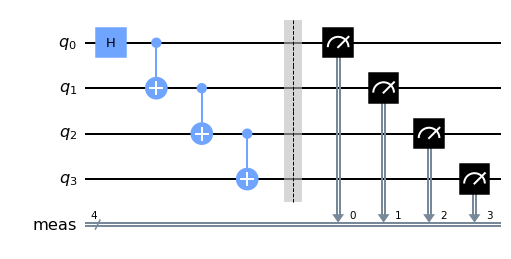

In [39]:
ghz=QuantumCircuit(4)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)
ghz.cx(2,3)
ghz.measure_all()
ghz.draw('mpl')

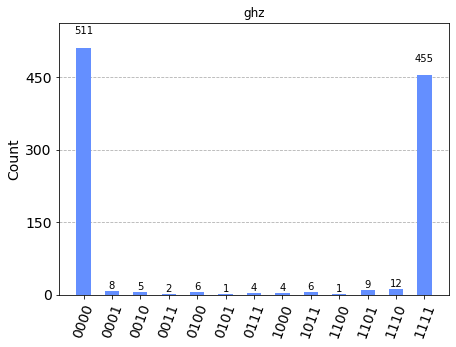

In [30]:
ghz.save_statevector()
result=backend.run(ghz).result()
counts=result.get_counts()
plot_histogram(counts, title='ghz')

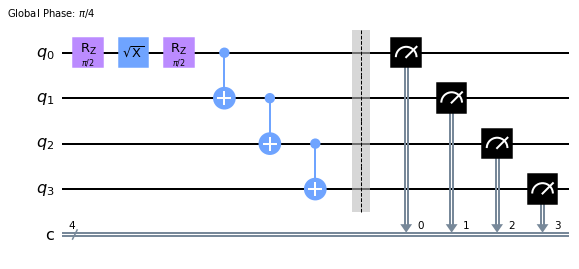

In [40]:
trans_ghz=transpile(ghz, backend, optimization_level=1)
small_ghz=mm.deflate_circuit(trans_ghz)
small_ghz.draw('mpl')

The best string is predicted to be [25, 24, 23, 21]
The worst string is predicted to be [5, 8, 11, 14]


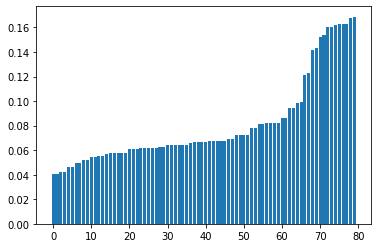

In [41]:
layouts=mm.matching_layouts(small_ghz,backend)
scores = mm.evaluate_layouts(small_ghz, layouts, backend)
import matplotlib.pyplot as plt
plt.bar(range(len(scores)), [i[1] for i in scores])
print(f"The best string is predicted to be {scores[0][0]}")
print(f"The worst string is predicted to be {scores[-1][0]}")

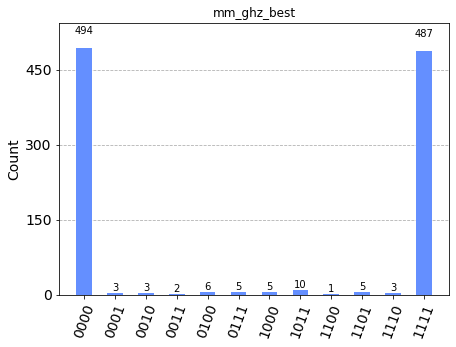

In [42]:
ghz_best=transpile(ghz, backend, initial_layout=[25,24,23,21])
result_best=backend.run(ghz_best).result()
counts_best=result_best.get_counts()
plot_histogram(counts_best, title='mm_ghz_best')

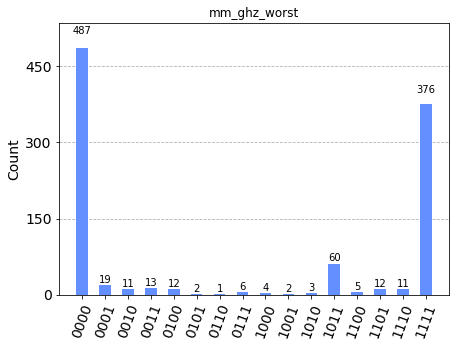

In [44]:
ghz_worst=transpile(ghz, backend, optimization_level=1, initial_layout=[5,8,11,14])
result_worst=backend.run(ghz_worst).result()
counts_worst=result_worst.get_counts()
plot_histogram(counts_worst, title='mm_ghz_worst')